# Лабораторная работа № 2
# Бабичева Анна М8О-404Б-17
# Вариант № 2

### Задание. Построить формирующий фильтр для случайного процесса $X(t)$, имеющего спектральную плотность $f_X(\lambda)$. Смоделировать три реализации этого процесса на промежутке $[0;10]$ методом численного интегрирования уравнений формирующего фильтра (шаг интегрирования $h=0.05$, нулевые начальные значения). $$f_X(\lambda)=\frac{2(1+\lambda^2)}{(1+4.25i\lambda-\lambda^2)(1-4.25i\lambda-\lambda^2)}$$

Импортирую необходимые библиотеки:

In [1]:
import time
import math

import matplotlib.pyplot as plt
import numpy as np


## Моделирование белого шума

Пусть имеется $n$ одинаково распределенных независимых случайных величин $V_1, V_2, ..., V_n$. $\{v_1, v_2, ..., v_n\}$ - реализации соответствующих случайных величин. Случайный процесс $V(t)$ - белый шум, если $V(t_i)=v_i, t=1...n$.

Стационарный случайный процесс с дробно-рациональной спектральной плотностью может быть построен с помощью линейного дифференциального уравнения с постоянными коэффициентами, на вход которого подается белый шум с единичной спектральной плотностью $S_V(\omega)=1$. Для такой спектральной плотности $\sigma_V^2=2\pi$.


В качестве распределения случайных величин будем брать $N(0,\sigma_V^2)$.


При построении формирующего фильтра будет использоваться нормированный процесс дискретного белого шума $\mathtt{\sim}N(0,1)$.


При моделировании белого шума воспользуюсь результатми из предыдущей работы:

In [2]:
# равномерное распределение на (0, 1)
def R01(n, t, q, p, X0):
    M = p ** q
    if X0 == None:
        X0 = round(time.time() * M)
        if X0 % 2 == 0:
            X0 -= 1
    mu = round(time.time() / 100)
    
    l = 8 * t - 3
    X = []
    for i in range(n):
        X1 = (l * X0 + mu) % M
        X.append(X1 / M)
        X0 = X1
    return X
# равномерное распределение на (a, b)
def R(a, b, n=1, t=1, q=6, p=10, X0=None):
    X = R01(n, t, q, p, X0)
    Y = [(b - a) * x + a for x in X]
    return np.array(Y)
# нормальное распределение с m=0 sigma=1
def N01(n):
    X = []
    for i in range(n):
        r = R(a=0, b=1, n=12)
        X.append((sum(r) - 6) / 1)
    return X
# нормальное распределение с m=m sigma=sigma
def N(m, sigma, n=1):
    X = N01(n)
    Y = [sigma * x + m for x in X]
    return np.array(Y)


In [7]:
# белый шум
def V(n=1):
    X = N(0, 2 * math.pi, n=n)
    return np.array(X)


## Формирующий фильтр


Предполагаем процесс $V(t)$ - гауссовским, нормированным условием $S_V=\frac{1}{2\pi}$. Чтобы найти передаточную функцию формирующего фильтра $\Phi(\lambda)$, спектральную плотность процесса $X(t)$ представляют в виде произведения двух комплексно-сопряженных сомножителей, а для дробно-рациональной $f_X(\lambda)$ функция $\Phi(\lambda)$ имеет вид:

$$\Phi(\lambda)=\frac{1}{\sqrt{S_V}}\frac{F(\lambda)}{H(\lambda)}$$

где

$F(\lambda)=2(1+\lambda^2)$

$H(\lambda)=(1+4.25i\lambda-\lambda^2)(1-4.25i\lambda-\lambda^2)$


Ей соответствует дифференциальное уравнение:

$$H(D)X(t)=\sqrt{S_V}F(D)V(t),\quad D=\frac{d}{dt}$$

Из данной формулы получаем уравнение формирующего фильтра:

$$H(D)X(t)=\sqrt{\frac{2\pi}{h}}F(D)V(t)$$

где $h$ - шаг интегрирования дифференциального уравнения формирующего фильтра.

Таким образом, получаю ДУ 4 порядка:

$$\ddddot{x}+16.0625\ddot{x}+x=2\sqrt{\frac{2\pi}{h}}(\ddot{v}+v)$$


Данное дифференциальное уравнение сводится к системе дифференциальных уравнений первого порядка:

\begin{cases}
    \dot{x_1}=x_2
    \\
    \dot{x_2}=x_3+2\sqrt{\frac{2\pi}{h}}v
    \\
    \dot{x_3}=x_4
    \\
    \dot{x_4}=-16.0625x_3-x_1+2\sqrt{\frac{2\pi}{h}}v
\end{cases}

Данную систему можно переписать в виде:

\begin{cases}
    d{x_1}=x_2dt
    \\
    d{x_2}=x_3dt+2\sqrt{\frac{2\pi}{h}}vdt
    \\
    d{x_3}=x_4dt
    \\
    d{x_4}=-16.0625x_3dt-x_1dt+2\sqrt{\frac{2\pi}{h}}vdt
\end{cases}

$V(t)dt=dW(t)$

Конечно-разностная аппроксимация приводит к виду:

\begin{cases}
    x_1=X
    \\
    x_1(t+h)=x_1(t)+x_2(t)h
    \\
    x_2(t+h)=x_2(t)+x_3(t)h+2\sqrt{\frac{2\pi}{h}}\sqrt{h}\epsilon_t
    \\
    x_3(t+h)=x_3(t)+x_4(t)h
    \\
    x_4(t+h)=x_4(t)-16.0625x_3(t)h-x_1(t)h+2\sqrt{\frac{2\pi}{h}}\sqrt{h}\epsilon_t
    \\
    \epsilon_t\mathtt{\sim}N(0,1)
\end{cases}

## Метод Эйлера решения ССДУ

Для данной схемы медот Эйлера:

\begin{cases}
    x_{1_0}=x_{2_0}=x_{3_0}=x_{4_0}=0
    \\
    x_{1_{j+1}}=x_{1_j}+hx_{2_j}
    \\
    x_{2_{j+1}}=x_{2_j}+hx_{3_j}+2\sqrt{2\pi}\epsilon_t
    \\
    x_{3_{j+1}}=x_{3_j}+hx_{4_j}
    \\
    x_{4_{j+1}}=x_{4_j}-h(16.0625x_{3_j}+x_{1_j})+2\sqrt{2\pi}\epsilon_t
    \\
    t_{j+1}=t_j+h
    \\
    \epsilon_t\mathtt{\sim}N(0,1)
    \\
    x_1=X
\end{cases}

In [4]:
# метод Эйлера
def Eiler(x10=0, x20=0, x30=0, x40=0, t_min=0, t_max=10, h=0.05):
    if (t_max < t_min) | (t_min * t_max < 0):
        raise Exception("Неверно заданы временные границы")
    t = np.arange(0, 10 + h, h)
    x1 = [x10]
    x2 = [x20]
    x3 = [x30]
    x4 = [x40]
    e = [N(0, 1)]
    
    for j in range(len(t) - 1):
        x1.append(x1[j] + h * x2[j])
        x2.append(x2[j] + h * x3[j] + 2 * math.sqrt(2 * math.pi) * e[j])
        x3.append(x3[j] + h * x4[j])
        x4.append(x4[j] - h * (16.0625 * x3[j] + x1[j]) + 2 * math.sqrt(2 * math.pi) * e[j])
        e.append(N(0, 1))
    return t, x1, e


Получим реализации:

In [6]:
t, X_1, e_1 = Eiler()
t, X_2, e_2 = Eiler()
t, X_3, e_3 = Eiler()


### Графики реализаций

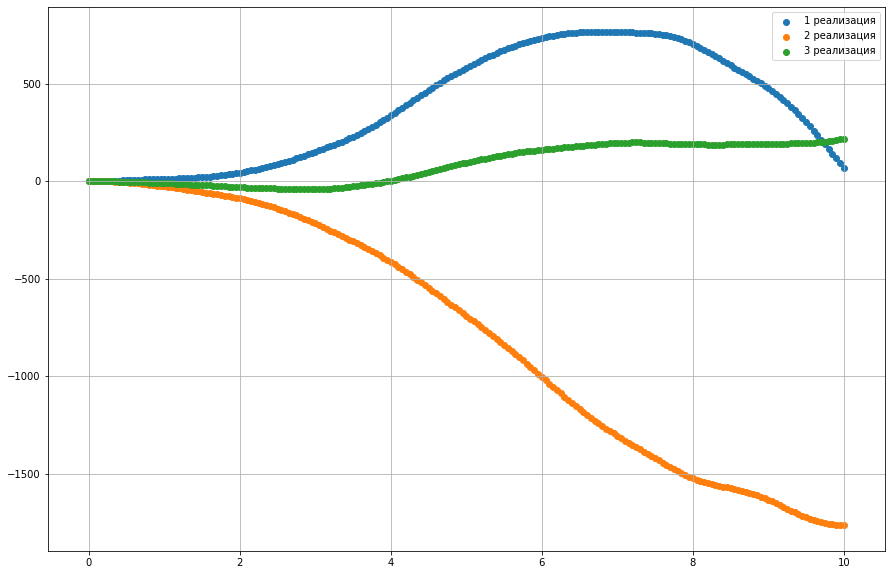

In [8]:
# график
fig = plt.figure(figsize=(15, 10))
plt.grid()

plt.scatter(t, X_1)
plt.scatter(t, X_2)
plt.scatter(t, X_3)

plt.legend(['1 реализация', '2 реализация', '3 реализация'])
plt.show()


### Графики $\epsilon_t$

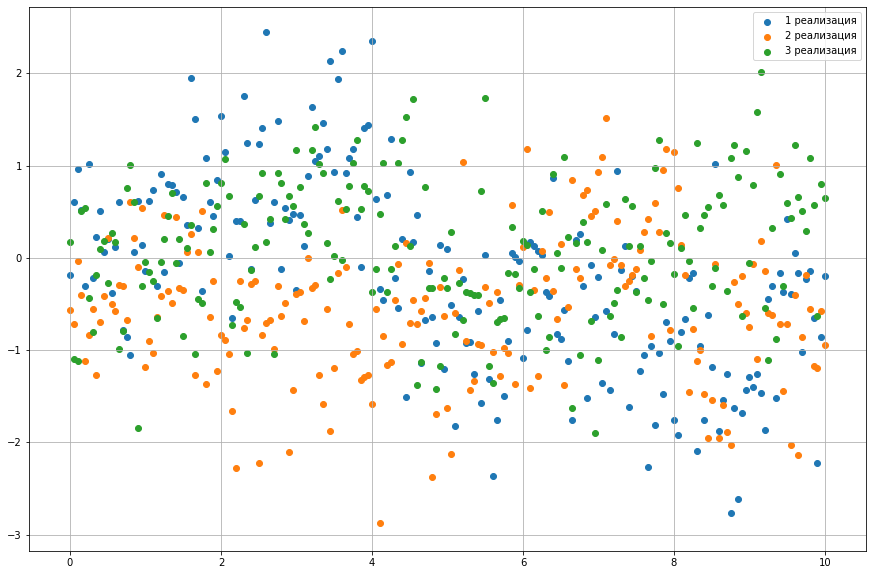

In [9]:
# график
fig = plt.figure(figsize=(15, 10))
plt.grid()

plt.scatter(t, e_1)
plt.scatter(t, e_2)
plt.scatter(t, e_3)

plt.legend(['1 реализация', '2 реализация', '3 реализация'])
plt.show()
